# Import библиотек

In [93]:
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# Считываем очищенный файл в DataFrame



метод .read_csv(path,delimiter) 

In [94]:
df = pd.read_csv('cars_moldova_clean.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


## Задание 1 : Визуализация данных с использованием библиотеки Pandas


### Создание гистограммы

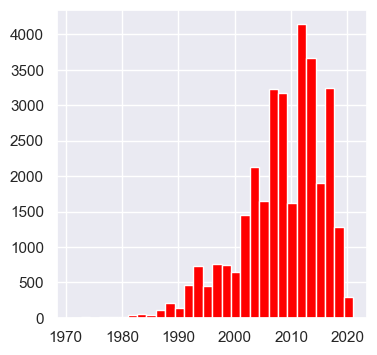

In [95]:
plt.hist(df['Year'],bins=30,color='red')
plt.title('')
plt.show()

### Создание круговой диаграммы

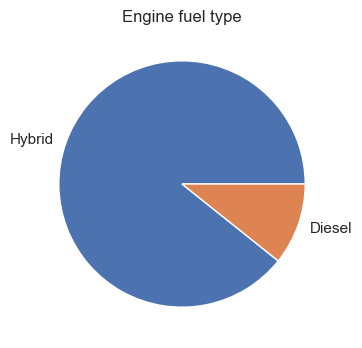

In [96]:
new_df = df[(df['Fuel_type']=='Hybrid') ^ (df['Fuel_type']=='Diesel')]

plt.title('Engine fuel type')
plt.pie(new_df['Fuel_type'].value_counts(),labels=new_df['Fuel_type'].unique())
plt.show()

### Создание диаграммы рассеяния

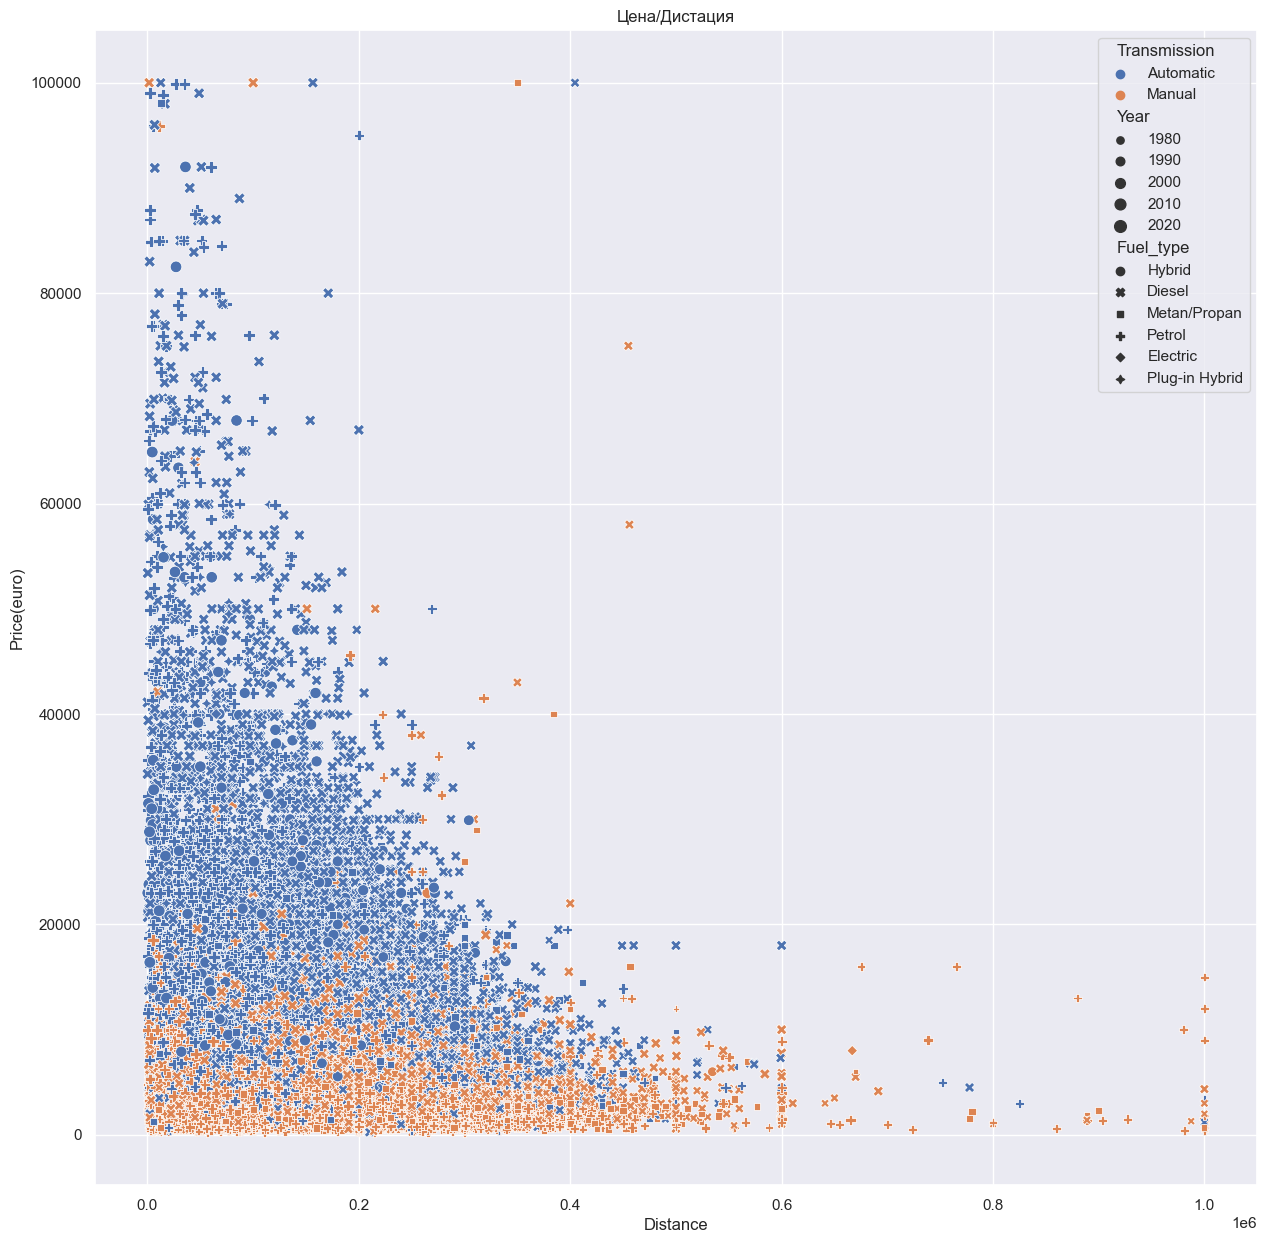

In [103]:
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=df,x='Distance',y='Price(euro)',hue='Transmission',style='Fuel_type',size='Year')
plt.title('Цена/Дистация')
plt.show()

# Задание 2 : Добавление в модель дополнительных признаков на основе имеющихся. 

### Создание нового датафрейма

In [98]:
df_new = df.copy()

### Добавление нового признака

In [99]:
df_new['Capacity_value'] = df_new['Price(euro)']/df_new['Engine_capacity(cm3)']
df_new.head

<bound method NDFrame.head of              Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32215  Volkswagen        Passat  2016      Sedan   88000.0   
32216  Land Rover    Freelander  2002  Crossover  225000.0   
32217       Dacia     Logan Mcv  2015  Universal   89000.0   
32218       Mazda             6  2006      Combi  370000.0   
32219     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
0                    1800.0        Hybrid    Automatic       7750.0   11   
1                    1500.0        Diesel       Manual       8550.0    8 

### Просмотр корреляций с имеющимися признаками

In [100]:
corr = df_new.corr()
cm = sns.color_palette("vlag", as_cmap=True)
corr.style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Capacity_value
Year,1.000000,-0.434240,-0.025886,0.551517,-1.000000,0.425819,0.417374
Distance,-0.434240,1.000000,0.067473,-0.347328,0.434240,0.462784,-0.255204
Engine_capacity(cm3),-0.025886,0.067473,1.000000,0.382841,0.025886,-0.010412,-0.119458
Price(euro),0.551517,-0.347328,0.382841,1.000000,-0.551517,0.156816,0.603012
Age,-1.000000,0.434240,0.025886,-0.551517,1.000000,-0.425819,-0.417374
km_year,0.425819,0.462784,-0.010412,0.156816,-0.425819,1.000000,0.139977
Capacity_value,0.417374,-0.255204,-0.119458,0.603012,-0.417374,0.139977,1.000000


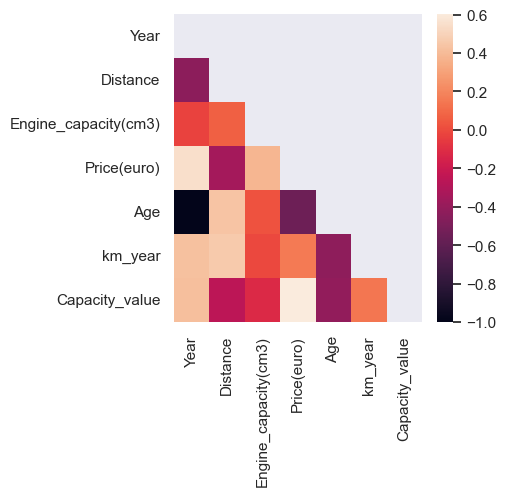

In [101]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize':(4,4)})
sns.heatmap(corr, mask=mask)
plt.show()

# Задание 3 : Предварительная Обработка

**Стандартизация**

In [121]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] 
 Число столблцов =  6


In [120]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

<AxesSubplot:xlabel='Distance', ylabel='Count'>

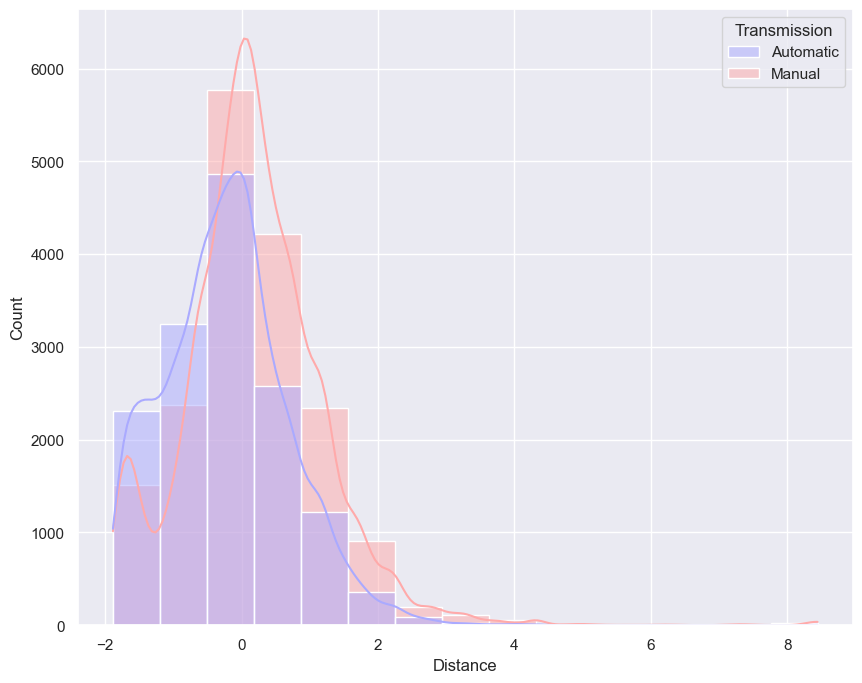

In [119]:
fig = plt.figure(figsize=(10,8))
sns.histplot(data = DF_scaled,
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')